In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

font = {'family' : 'monospace',
        #'weight' : 'bold',
        'size'   : 20}
plt.rc('figure', figsize=(16,9))
plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', lw=2)

## Problema 2

In [2]:
N = 10
x = 0.5
e= 0

for n in range(N):
    e += (x**n)/np.math.factorial(n)
    print(e)

    

1.0
1.5
1.625
1.6458333333333333
1.6484375
1.6486979166666667
1.6487196180555554
1.6487211681547618
1.6487212650359622
1.648721270418251


<div style="background:#999900"> esta bien , pero habría que medir el error para decidir la convergencia </div>

## Problema 3

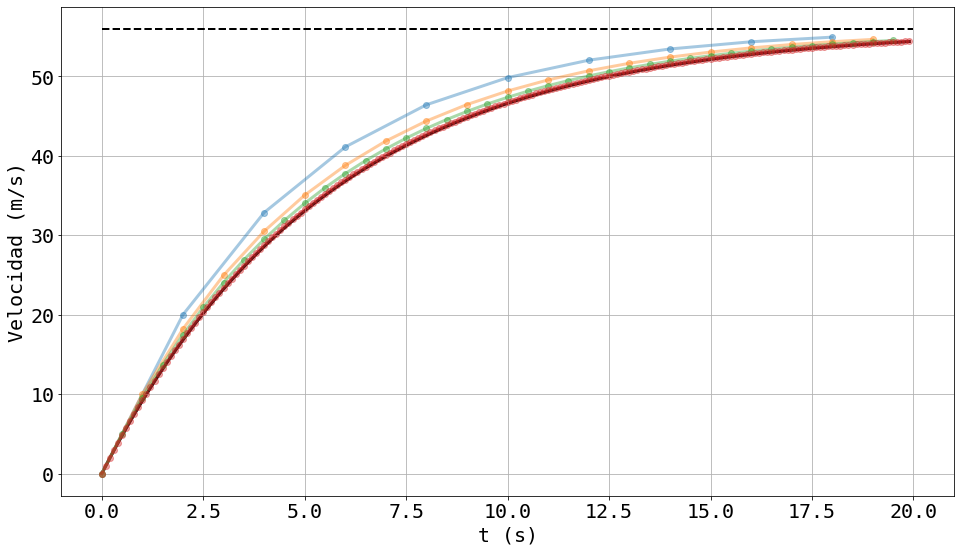

In [3]:
m = 70 #kg
gamma = 12.5 #kg/seg
g = 10 #m/s2
deltaT = [2, 1, 0.5, 0.1 ]
tf = 20

vlim = g*m/gamma

plt.figure(figsize=(16,9))

plt.xlabel('t (s)')
plt.ylabel('Velocidad (m/s)') 
plt.hlines(vlim, 0, tf, color='k', linestyles='dashed')

plt.grid(True)

for dt in deltaT:
    t = np.arange(0,tf, dt)
    v = np.zeros(len(t))
    v_analitica = g*m/gamma*(1-np.exp(-(gamma/m)*t))
    for i in range(len(t)):
        if i ==0:
            v[i] = 0
        else:
            v[i] = v[i-1] + (g - gamma/m*v[i-1])*dt

    plt.plot(t, v, 'o-',linewidth= 3, alpha=0.4)

plt.plot(t, v_analitica, 'k', linewidth=3, zorder=-1)

<div style="background:#999900">recordar siempre separar el cálculo del gráfico</div>

In [10]:
m = 70 #kg
gamma = 12.5 #kg/seg
g = 10 #m/s2
deltaT = [2, 1, 0.5, 0.1 ]
tf = 20

vlim = g*m/gamma
v = {}
t = {} # diccionarios vacíos
for dt in deltaT:
    t[dt] = np.arange(0,tf, dt)
    v[dt] = [0] # np.zeros(len(t))
#    v_analitica = g*m/gamma*(1-np.exp(-(gamma/m)*t))
    [v[dt].append(v[dt][-1]+(g - gamma/m*v[dt][-1])*dt) for ti in t[dt][:-1]]
    

<div style="background:#999900"> v analitica solo necesitas calcularla una vez</div>

In [24]:
v_analitica = g*m/gamma*(1-np.exp(-(gamma/m)*t[deltaT[-1]]))

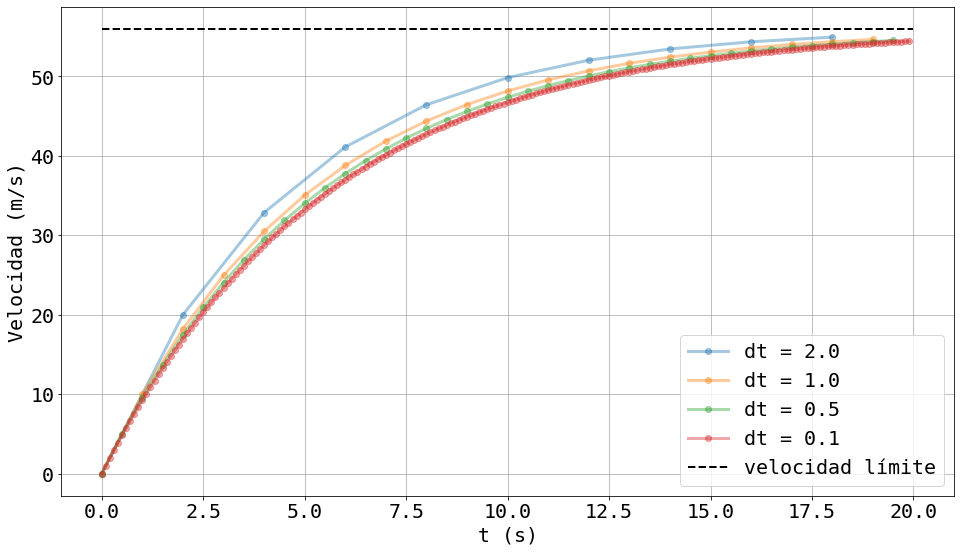

In [25]:
plt.figure(figsize=(16,9))
plt.xlabel('t (s)')
plt.ylabel('Velocidad (m/s)') 
plt.hlines(vlim, 0, tf, color='k', linestyles='dashed', label='velocidad límite')
plt.grid(True)
for (dt,tdt), vdt in zip( t.items(), v.values()):
    plt.plot(tdt, vdt, 'o-',linewidth= 3, alpha=0.4, label=f'dt = {dt:0.1f}')
plt.legend()
#plt.plot(t, v_analitica, 'k', linewidth=3, zorder=-1)

## Problema 4

In [26]:
A = np.array([[1,-3,-2], [2,-4,-3], [-3,6,8]])
b = np.array([6,8,-5])

x = np.linalg.solve(A,b)
x

array([ 1., -3.,  2.])

## Problema 5

$$
J = -k\frac{dT}{dz}
$$

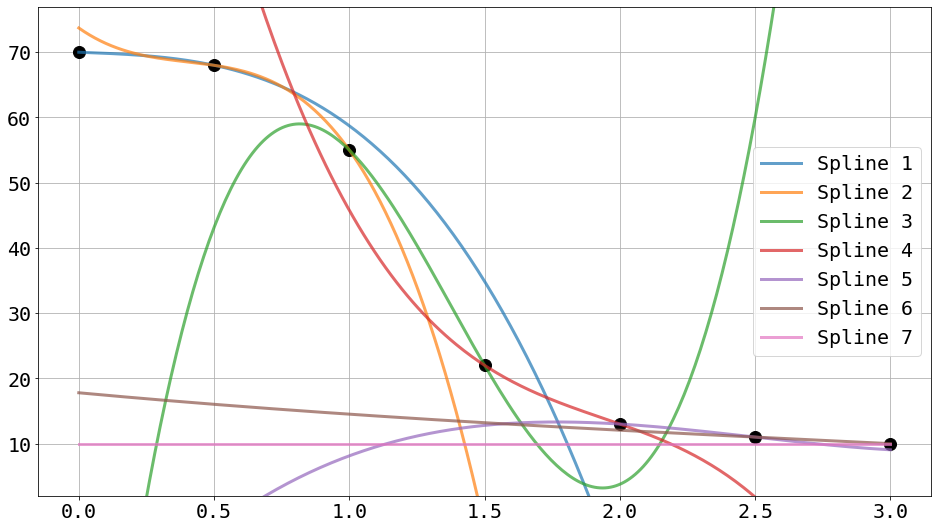

In [27]:
k = 0.01 #cal/(s cm �C)
z = np.array([0, 0.5, 1., 1.5, 2.0, 2.5, 3.])
T = np.array([70, 68, 55, 22, 13, 11, 10])
N = len(z)

h = [z[i+1]-z[i] for i in range(N-1)]
A = np.eye(N)
y = np.zeros((N,1))
for i in range(1, N-1):
    A[i,i] = 2*(h[i]+h[i-1])
    A[i,i-1] = h[i-1]
    A[i,i+1] = h[i]
    y[i] = 3*(T[i+1]-T[i])/h[i] - (T[i]-T[i-1])/h[i-1]
    
b = np.linalg.solve(A,y)

d = T
c = np.zeros((N,1))
a = np.zeros((N,1))
for i in range(N-1):
    a[i] = 1/3*(b[i+1]-b[i])/h[i]
    c[i] = ((d[i+1]-d[i])/h[i])- b[i]*h[i] - a[i]*h[i]**2 



plt.plot(z, T, 'ok', lw=4, markersize=12)

for i in range(N):
    z_ext = np.linspace(min(z), max(z), 300)
    f = d[i] + c[i]*(z_ext-z[i]) + b[i]*(z_ext-z[i])**2 + a[i]*(z_ext-z[i])**3
    plt.plot(z_ext, f, alpha=0.7, label= 'Spline {}'.format(i+1), lw=3)

plt.ylim([min(T)*0.2,max(T)*1.1])
plt.legend()
plt.grid(True)

## Problema 7
fd

In [49]:

a = 0
b = 30
n = 51
dz = b/n
# h = (b - a) / (n - 1)
z = np.linspace(a, b, n+1)
# print(z)
# z = np.arange(a, b, )
f = 200 * (z/(5+z))*np.exp(-2*z/30)

#el t�rmino (b-a)/2 en nuestro caso es n que es el intervalo que utilizo 
#como base de mi trapecio o de mi caudradu

I_sq = np.sum(dz*f)
I_trap = dz*(2*np.sum(f) - (f[0] + f[-1]))/2
I = np.trapz(f, dx=dz)
#list2 = [x for ind, x in enumerate(list1) if 4 > ind > 0]

sum_even = np.sum([even for i, even in enumerate(f) if (i%2==0) & (i>0)])
sum_odd = np.sum([odd for i, odd in enumerate(f) if (i%2==1) & (i<(b-1))])


I_simpson = ((b-a)/(n-1))* (f[0] + 4*sum_even + 2*sum_odd + f[-1])*(1/3)
print('Integracion "simple": ', I_sq)
print('Integracion trapecios', I_trap)
print('Integracion simpson', I_simpson)
print('Integracion numpy: ',I)
# print('Integracion scipy: ', integrate(f, ))
# I_trap = ((b-a)/)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

# plt.figure(figsize=(16,9))
# plt.plot(z,f, 'o')

Integracion "simple":  1486.1994953861815
Integracion trapecios 1479.375867659966
Integracion simpson 1348.280980599378
Integracion numpy:  1479.3758676599655


<div style="background:#99900"></div>

<div style="background:#99900"></div>

<div style="background:#999900">es notable que simpson te de tan mal. te faltara considerar algun intervalo ? </div>

In [33]:
from scipy.integrate import quad

In [34]:
def func(z):
    return 200 * (z/(5+z))*np.exp(-2*z/30)

In [44]:
Iquad , err = quad(func,a,b,epsrel=1e-10)

In [45]:
Iquad 

1480.568480085906

In [38]:
err

1.68117163592673e-07